## Observations and Insights

1. In comparing all 9 drugs and the placebo, the top 2 drugs are Capomulin and Ramicane. 
2. When examining the tumor volume of mouse j246, the effectiveness of Capomulin on tumor size increased dramatically at around 30 days.
3. In calculating the linear regression of average weight of mice on Capomulin to their average tumor volume, there is not a strong correlation between the two. 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Data/Homework_05-Matplotlib_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "Data/Homework_05-Matplotlib_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [51]:
# Combine the data into a single dataset
combined_mousedata_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mousedata_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [52]:
# Check the number of mice.
mouse_count=combined_mousedata_df["Mouse ID"].nunique()
mouse_count

249

In [53]:
# Determine duplicate data using duplicated()
duplicate_mice=combined_mousedata_df[combined_mousedata_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicate_mice)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  


In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [55]:
# Optional: Get all the data for the duplicate mouse ID.
combined_mousedata_df.loc[combined_mousedata_df["Mouse ID"]== "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousedata=combined_mousedata_df.loc[combined_mousedata_df["Mouse ID"]!="g989"]
clean_mousedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [57]:
# Check the number of mice in the clean DataFrame.
clean_mousecount=clean_mousedata["Mouse ID"].nunique()
clean_mousecount

248

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_mean=clean_mousedata.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_mean=pd.DataFrame(clean_mousedata.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"])

tumor_median=clean_mousedata.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_median=pd.DataFrame(clean_mousedata.groupby("Drug Regimen").median()["Tumor Volume (mm3)"])

tumor_variance=clean_mousedata.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_variance=pd.DataFrame(clean_mousedata.groupby("Drug Regimen").var()["Tumor Volume (mm3)"])

tumor_deviation=clean_mousedata.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_deviation=pd.DataFrame(clean_mousedata.groupby("Drug Regimen").std()["Tumor Volume (mm3)"])

tumor_sem=clean_mousedata.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tumor_sem=pd.DataFrame(clean_mousedata.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"])


In [59]:
# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
drug_regimen=pd.DataFrame(
    {"Mean Tumor Volume": tumor_mean["Tumor Volume (mm3)"],
    "Median Tumor Volume": tumor_median["Tumor Volume (mm3)"],
    "Tumor Volume Variance": tumor_variance["Tumor Volume (mm3)"],
    "Tumor Volume Std. Dev.": tumor_deviation["Tumor Volume (mm3)"],
    "Tumor Volume Std. Err.": tumor_sem["Tumor Volume (mm3)"]
    }
)
drug_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
    # for each regimen
tumor_datadf = clean_mousedata.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
tumor_datadf=pd.DataFrame(clean_mousedata.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]}))
tumor_datadf

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

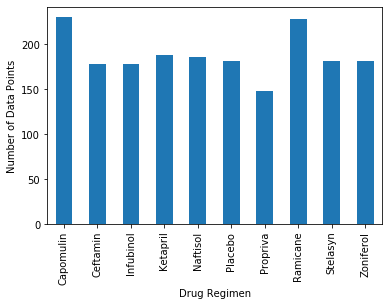

<Figure size 432x288 with 0 Axes>

In [61]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
    # the course of the study using pandas.
# Split up our data into groups based upon 'Drug Regimen'
drug_name = clean_mousedata.groupby("Drug Regimen")

# Find out how many of each mouse took each drug
number_mice = drug_name["Mouse ID"].count()

# Create a bar chart based off of the group series
mouse_treatment = number_mice.plot(kind='bar')

# Set the xlabel and ylabel using class methods
mouse_treatment.set_xlabel("Drug Regimen")
mouse_treatment.set_ylabel("Number of Data Points")


plt.show()
plt.tight_layout()

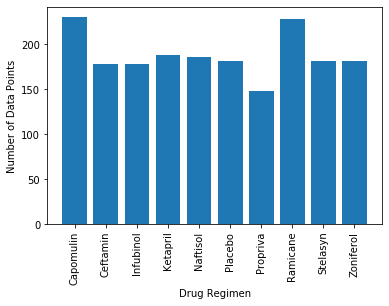

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
    # the course of the study using pyplot.
number_mice.index
plt.bar(range(len(number_mice)),number_mice,tick_label=number_mice.index)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation="vertical")
plt.show()

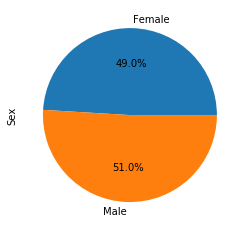

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Split up our data into groups based upon 'Sex'
mouse_gender = clean_mousedata.groupby("Sex")

# Find out how many of each gender
number_gender = mouse_gender["Sex"].count()

# Create a pie chart based off of the group series
genders_pie = number_gender.plot(kind='pie',autopct="%1.1f%%")
plt.show()

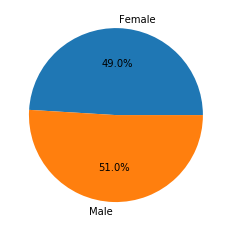

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender=clean_mousedata["Sex"].unique()
plt.pie(number_gender, labels=mouse_gender, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=clean_mousedata.groupby("Mouse ID", as_index=False)["Timepoint"].max()
greatest_timepoint=pd.DataFrame(clean_mousedata.groupby("Mouse ID", as_index=False)["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_tumorvolume=pd.merge(greatest_timepoint, clean_mousedata, on=["Mouse ID", "Timepoint"], how="inner")
greatest_tumorvolume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [90]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list=[]

# For each treatment in the list, calculate the IQR and quantitatively determine 
    # if there are any potential outliers
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_tumorvolume=greatest_tumorvolume.loc[greatest_tumorvolume["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset to tumor volume data list
    tumor_vol_list.append(mice_tumorvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = mice_tumorvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # calculate outliers:
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Filter by potential outliers (lower and upper bound) and output it
    outlier_occupancy = mice_tumorvolume.loc[(mice_tumorvolume < lower_bound) | (mice_tumorvolume > upper_bound)]
    print(f"{drug}'s potential outliers: {outlier_occupancy}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


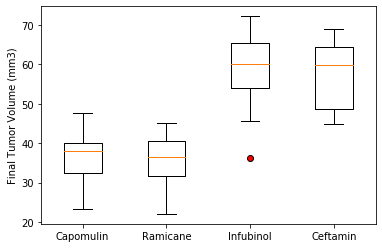

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#final_tumorvolume=greatest_tumorvolume.groupby("Drug Regimen")["Tumor Volume (mm3)"].max()
fig1, ax1 = plt.subplots()

final_tumorvolume=dict(markerfacecolor="r")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_list, labels=treatment_list, flierprops=final_tumorvolume)

plt.show()

## Line and Scatter Plots

In [69]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Locate the rows which contain mice on Capomulin
capomulin_mice=combined_mousedata_df.loc[combined_mousedata_df["Drug Regimen"]=="Capomulin"]
#capomulin_mice

In [70]:
# Select just one Mouse ID
singlemouse_capomulin=capomulin_mice.loc[capomulin_mice["Mouse ID"]=="j246"]
singlemouse_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1673,j246,0,45.000000,0,Capomulin,Female,21,21
1674,j246,5,45.641438,0,Capomulin,Female,21,21
1675,j246,10,46.408361,0,Capomulin,Female,21,21
1676,j246,15,43.312654,0,Capomulin,Female,21,21
1677,j246,20,44.020370,0,Capomulin,Female,21,21
1678,j246,25,44.555226,0,Capomulin,Female,21,21
1679,j246,30,38.044082,1,Capomulin,Female,21,21
1680,j246,35,38.753265,1,Capomulin,Female,21,21


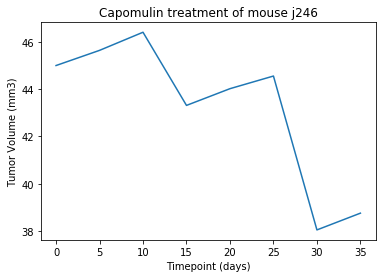

In [71]:
# Set x axis to "Timepoint" of singlemouse_capomulin dataframe
x_axis_data=singlemouse_capomulin["Timepoint"]

# Set y axis to "Tumor Volume" of singlemouse_capomulin dataframe
tumorvolume_data=singlemouse_capomulin["Tumor Volume (mm3)"]

# Create a graph based upon the two lists we have created
plt.plot(x_axis_data,tumorvolume_data)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse j246")

plt.show()

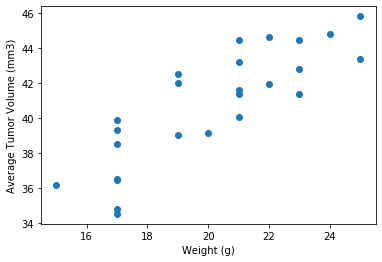

In [76]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Using GroupBy, pull by "Mouse ID" to find the average tumor volume
avg_tumorvolume=capomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
#avg_tumorvolume.head()

# Using GroupBy, pull by "Mouse ID" to find the average weight
avg_weight=capomulin_mice.groupby("Mouse ID")["Weight (g)"].mean()
#avg_weight


plt.scatter(avg_weight,avg_tumorvolume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

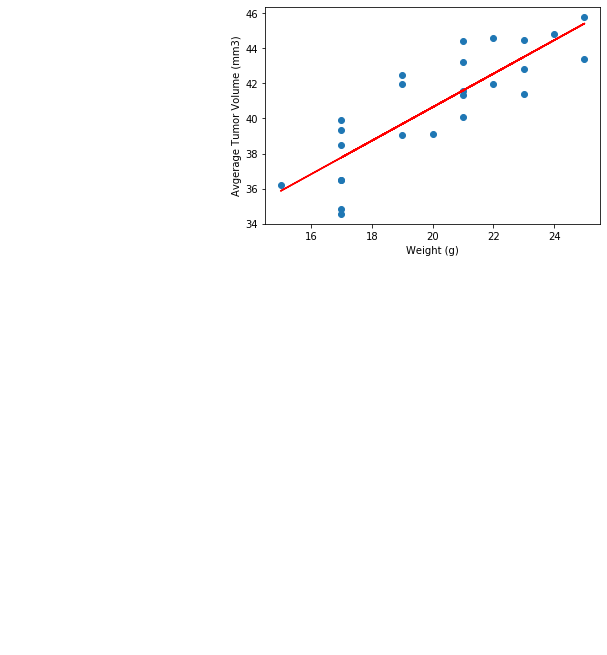

In [75]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumorvolume)
regress_values = avg_weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(avg_weight,avg_tumorvolume)
plt.plot(avg_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avgerage Tumor Volume (mm3)')
plt.show()